In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import numpy as np
from preprocess import Preprocess
from utils import *
from learn import *
from matplotlib import pyplot as plt

Preprocess: rename and standarize size

In [14]:
# data = Preprocess("source_images")
# data.standarizeImges()

Left: Original

Right: Filtered

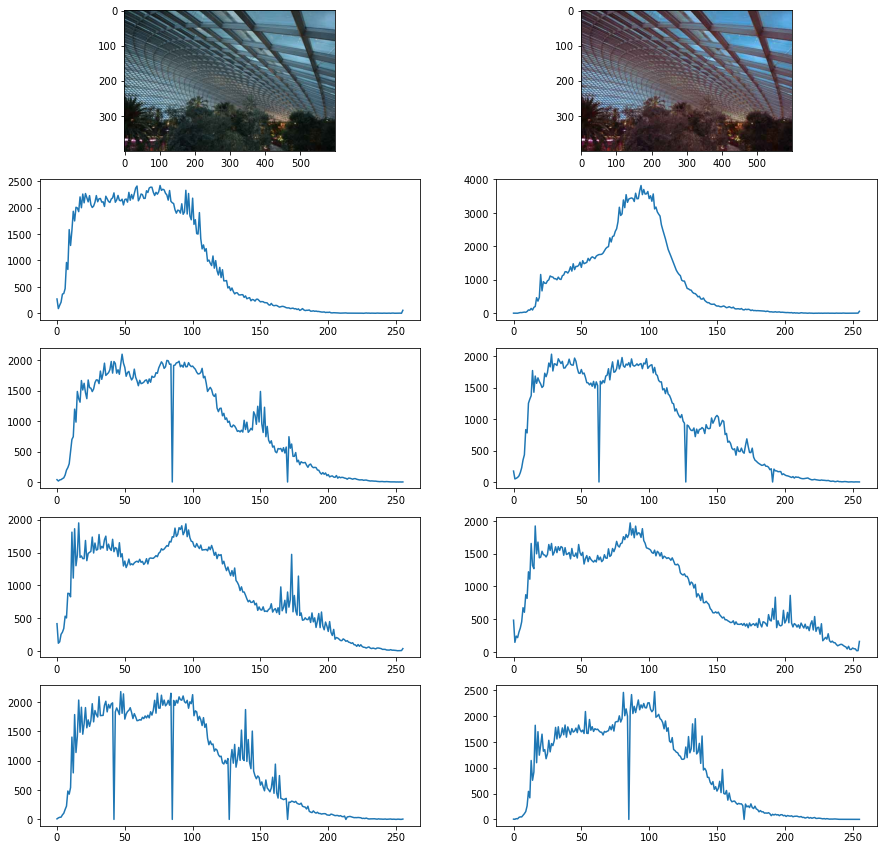

In [3]:
print_histogram(["source_images/0.jpg", "targetimages/0.jpg"], isfn=True, cdf=False)

Load Image

In [3]:
play = Data("source_images")
play.getHistograms()
np.shape(play.histogram)

(6, 256)

In [4]:
play_test = Data("target_images")
play_test.getHistograms()
np.shape(play_test.histogram)

(6, 256)

In [ ]:
s_img = "source_images/6.jpg"
t_img = "target_images/6.jpg"

# Initial Approach

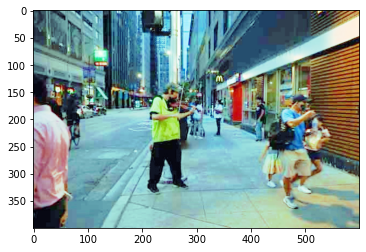

In [464]:
learn = LearnFilter(play, play_test)
learn.learnFormHist()
filtered = filterImage(learn.A, learn.A_R, learn.A_G, learn.A_B, s_img, type="Hist")

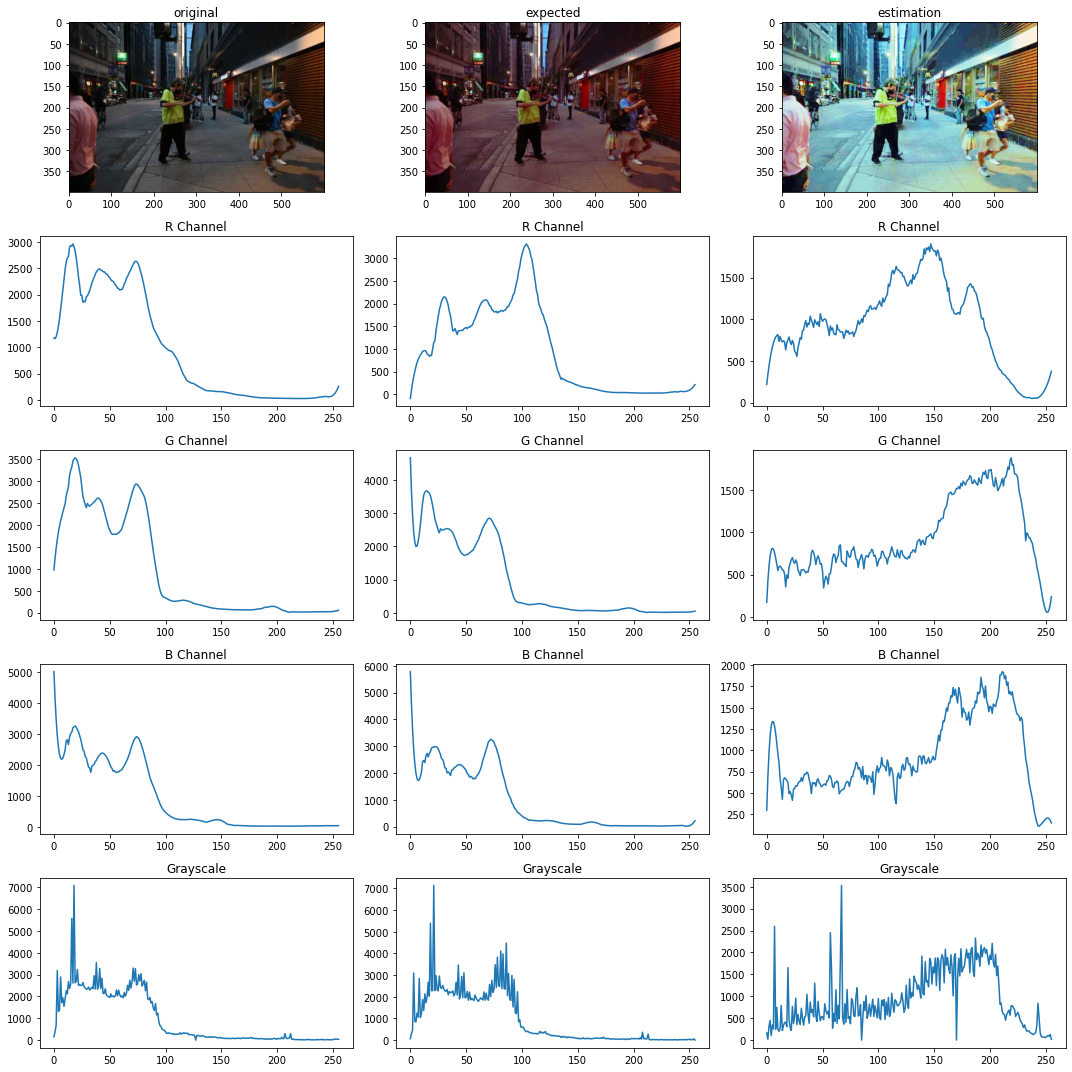

In [465]:
img = cv2.imread(s_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_f = cv2.imread(t_img)
img_f = cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB)
print_histogram([img, img_f, filtered], ["original", "expected", "estimation"], isfn=False, cdf=False)

In [328]:
# learn.learnFormCDF()
# filtered = filterImage(learn.A_cdf, learn.A_cdf_R, learn.A_cdf_G, learn.A_cdf_B, "target_images/10.jpg", type="CDF")

# Curve Approach

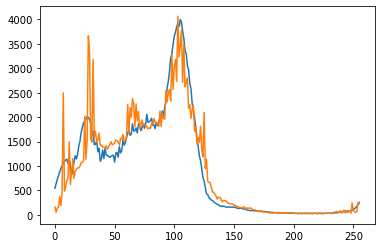

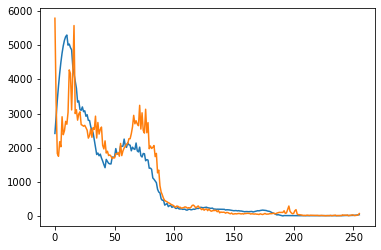

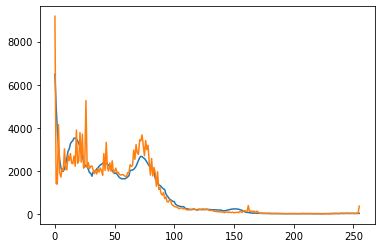

In [454]:
source = Image(s_img)
target = Image(t_img)
curve_pointR = optimize_curve(source.histogramR, target.histogramR, fineTune=False)
curve_pointG = optimize_curve(source.histogramG, target.histogramG, fineTune=False)
curve_pointB = optimize_curve(source.histogramB, target.histogramB, fineTune=False)
plt.plot(func(source.histogramR,curve_pointR))
plt.plot(target.histogramR)
plt.show()
plt.plot(func(source.histogramG,curve_pointG))
plt.plot(target.histogramG)
plt.show()
plt.plot(func(source.histogramB,curve_pointB))
plt.plot(target.histogramB)
plt.show()

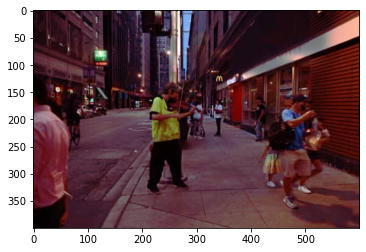

In [455]:
filtered_basic = filterImage_curve(curve_pointR,curve_pointG,curve_pointB, s_img)

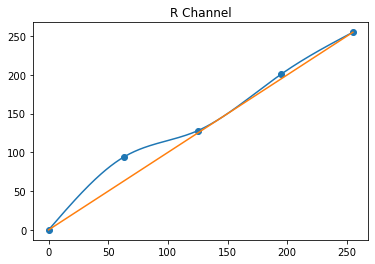

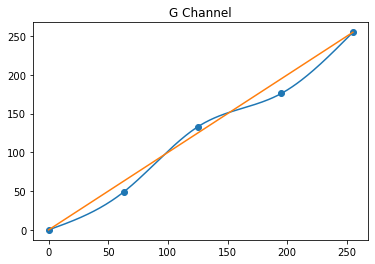

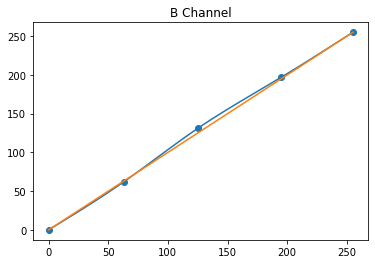

In [456]:
plot_curves([curve_pointR, curve_pointG, curve_pointB])

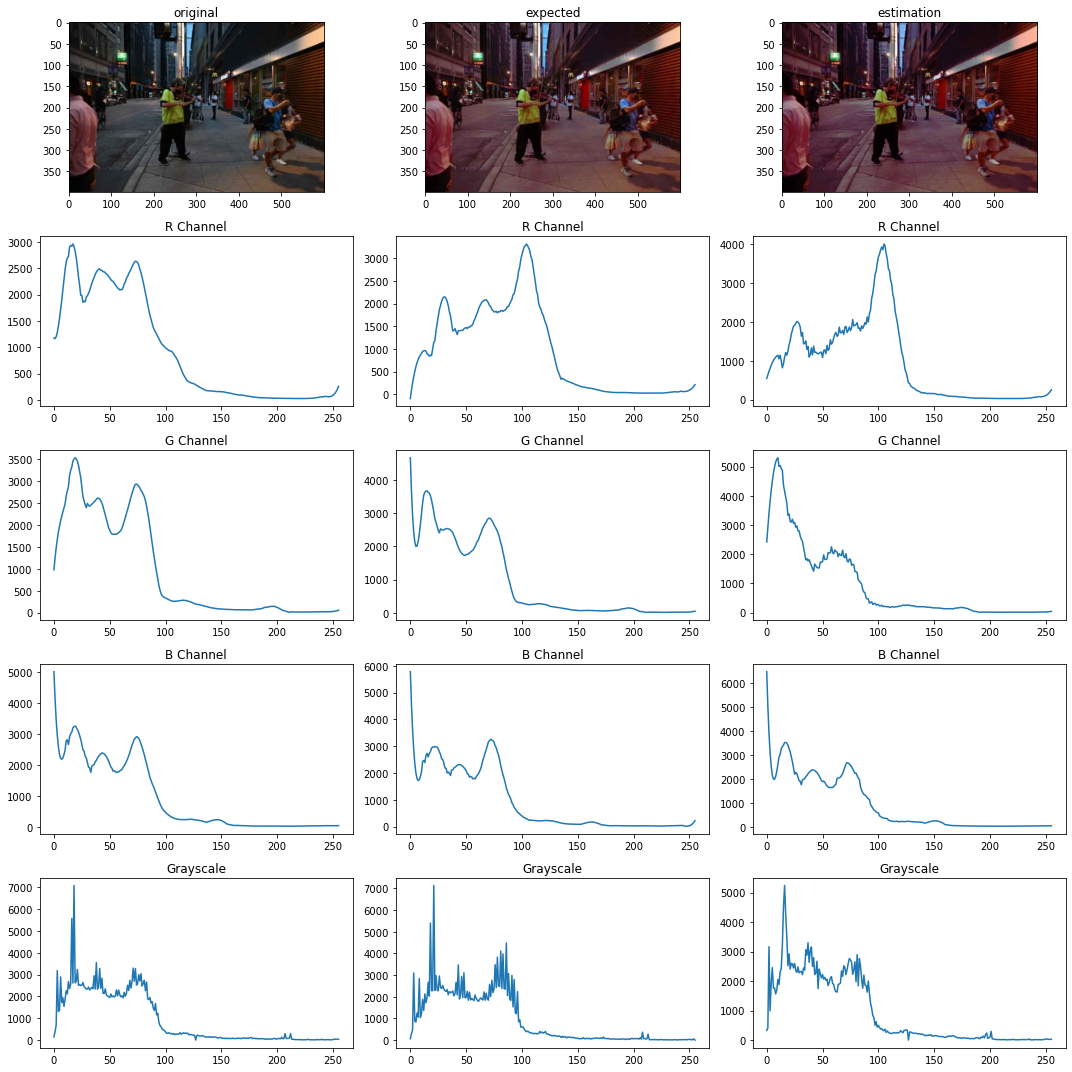

In [457]:
img = cv2.imread(s_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_f = cv2.imread(t_img)
img_f = cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB)
print_histogram([img, img_f, filtered_basic], ["original", "expected", "estimation"], isfn=False, cdf=False)

# Advanced

In [458]:
target = Image(t_img)
source = Image(s_img)
# target = Image("target_images/0.jpg")
# source = Image("source_images/0.jpg")

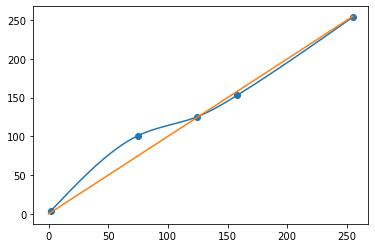

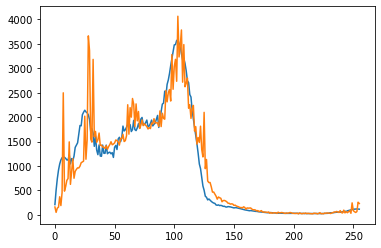

In [459]:
mountR, curve_pointR = optimize_advance_curve(source.histogramR, target.histogramR)
plot_curve(curve_pointR, mountR)
plt.plot(func(source.histogramR,curve_pointR, mountR))
plt.plot(target.histogramR)

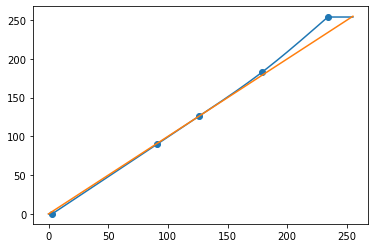

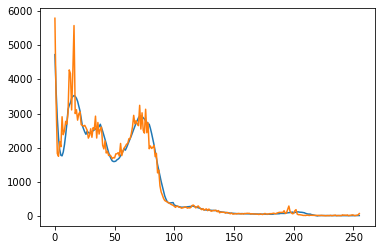

In [460]:
mountG, curve_pointG = optimize_advance_curve(source.histogramG, target.histogramG)
plot_curve(curve_pointG, mountG)
plt.plot(func(source.histogramG,curve_pointG, mountG))
plt.plot(target.histogramG)

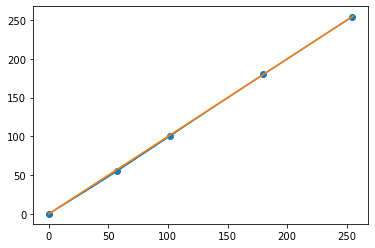

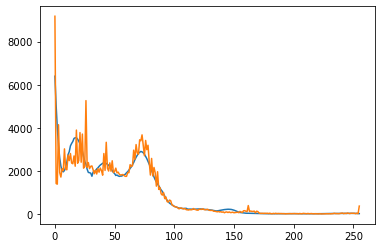

In [461]:
mountB, curve_pointB = optimize_advance_curve(source.histogramB, target.histogramB)
plot_curve(curve_pointB, mountB)
plt.plot(func(source.histogramB,curve_pointB, mountB))
plt.plot(target.histogramB)

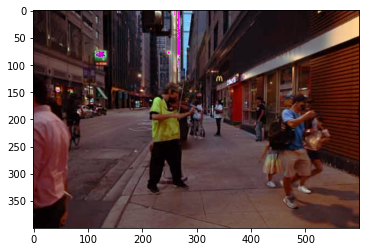

In [462]:
filtered = filterImage_curve_advanced([curve_pointR,curve_pointG,curve_pointB],[mountR, mountG, mountB], s_img)

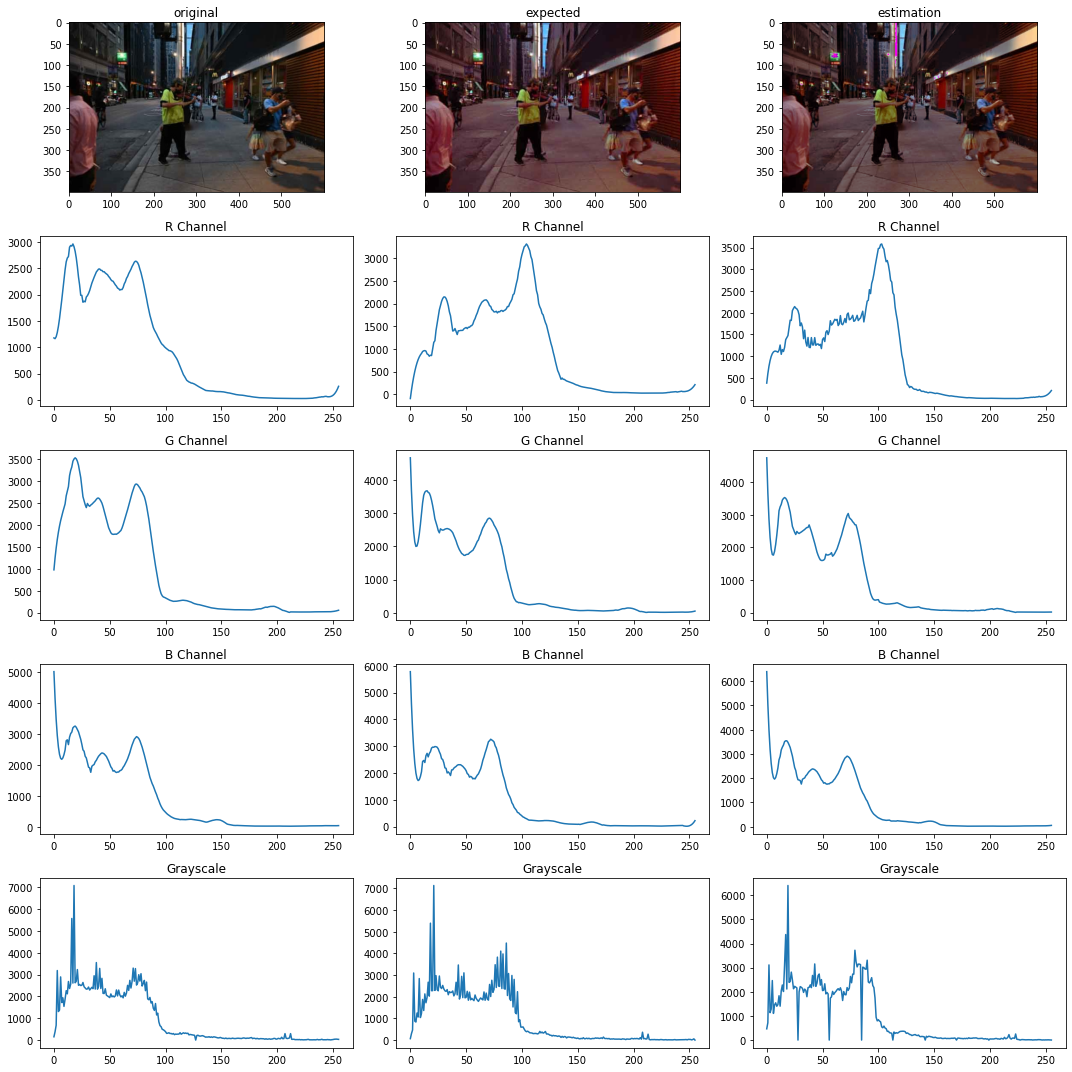

In [463]:
img = cv2.imread(s_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_f = cv2.imread(t_img)
img_f = cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB)
print_histogram([img, img_f, filtered], ["original", "expected", "estimation"], isfn=False, cdf=False)